In [72]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df=pd.read_csv('transaction.csv')

In [74]:
df.head()

,time,total
0,02-08-2021,268715
1,03-08-2021,3987
2,04-08-2021,0
3,05-08-2021,0
4,06-08-2021,265550


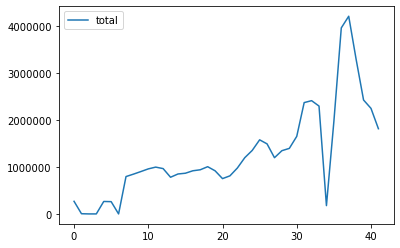

In [75]:
df.plot()
plt.ticklabel_format(style='plain', axis='y')

In [76]:
df.columns = ['ds','y']
df.head()

,ds,y
0,02-08-2021,268715
1,03-08-2021,3987
2,04-08-2021,0
3,05-08-2021,0
4,06-08-2021,265550


In [77]:
df['ds'] = pd.to_datetime(df['ds'])

In [78]:
df.head()

,ds,y
0,2021-02-08,268715
1,2021-03-08,3987
2,2021-04-08,0
3,2021-05-08,0
4,2021-06-08,265550


In [79]:
from fbprophet import Prophet

In [80]:
# Initialize the Model
model=Prophet()

In [81]:
df.columns

Index(['ds', 'y'], dtype='object')

In [82]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [84]:
df.tail()

,ds,y
37,2021-08-09,4215316
38,2021-09-09,3295075
39,2021-10-09,2429023
40,2021-11-09,2250801
41,2021-12-09,1816928


In [85]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=1)

In [86]:
future_dates.tail()

,ds
38,2021-11-08
39,2021-11-09
40,2021-12-08
41,2021-12-09
42,2021-12-10


In [87]:
future_dates.head()

,ds
0,2021-01-09
1,2021-02-08
2,2021-02-09
3,2021-03-08
4,2021-03-09


In [88]:
prediction=model.predict(future_dates)

In [89]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-09,9.817973e+05,-254714.082770,2.151848e+06,9.817973e+05,9.817973e+05,20652.066547,20652.066547,20652.066547,20652.066547,20652.066547,20652.066547,0.0,0.0,0.0,1.002449e+06
1,2021-02-08,1.022678e+06,-176749.098699,2.193489e+06,1.022678e+06,1.022678e+06,-30281.854695,-30281.854695,-30281.854695,-30281.854695,-30281.854695,-30281.854695,0.0,0.0,0.0,9.923961e+05
2,2021-02-09,1.024041e+06,182519.114901,2.417322e+06,1.024041e+06,1.024041e+06,286962.848582,286962.848582,286962.848582,286962.848582,286962.848582,286962.848582,0.0,0.0,0.0,1.311004e+06
3,2021-03-08,1.060833e+06,-115573.291739,2.144928e+06,1.060833e+06,1.060833e+06,-30281.854696,-30281.854696,-30281.854696,-30281.854696,-30281.854696,-30281.854696,0.0,0.0,0.0,1.030551e+06
4,2021-03-09,1.062196e+06,197027.473754,2.472683e+06,1.062196e+06,1.062196e+06,286962.848582,286962.848582,286962.848582,286962.848582,286962.848582,286962.848582,0.0,0.0,0.0,1.349159e+06


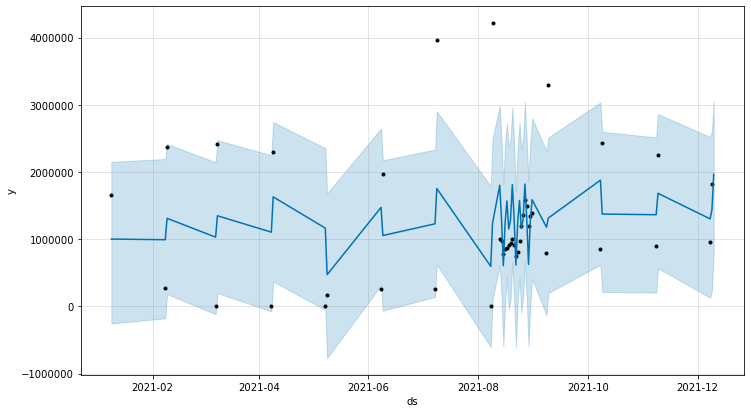

In [90]:
### plot the predicted projection
model.plot(prediction)
plt.ticklabel_format(style='plain', axis='y')

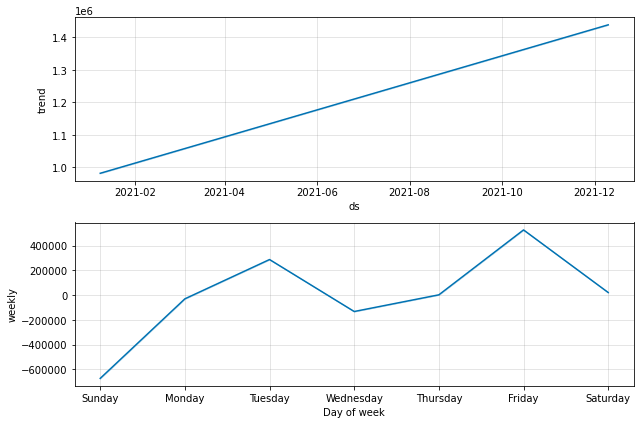

In [91]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.ticklabel_format(style='plain', axis='y')

In [92]:
df.head()

,ds,y
0,2021-02-08,268715
1,2021-03-08,3987
2,2021-04-08,0
3,2021-05-08,0
4,2021-06-08,265550


In [93]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='120 days', period='30 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-05-13 00:00:00 and 2021-10-10 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-08,1.039955e+06,9.136981e+05,1.164715e+06,265550,2021-05-13
1,2021-06-09,-3.405621e+06,-3.540253e+06,-3.273129e+06,1968098,2021-05-13
2,2021-07-08,-1.172870e+06,-1.301338e+06,-1.047890e+06,261460,2021-05-13
3,2021-07-09,1.126371e+06,1.000786e+06,1.271990e+06,3966728,2021-05-13
4,2021-07-08,-1.498217e+06,-1.720150e+06,-1.295416e+06,261460,2021-06-12


In [94]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,7 days,2.441944e+12,1.562672e+06,1.394223e+06,1.614327,0.333333
1,8 days,1.302252e+12,1.141163e+06,1.000623e+06,1.235677,0.500000
2,9 days,2.368474e+12,1.538985e+06,1.305605e+06,1.614327,0.333333
3,10 days,2.488412e+12,1.577470e+06,1.398754e+06,1.614327,0.333333
4,11 days,2.185702e+12,1.478412e+06,1.217601e+06,1.306759,0.500000


In [95]:
df_p.head()

,horizon,mse,rmse,mae,mdape,coverage
0,7 days,2.441944e+12,1.562672e+06,1.394223e+06,1.614327,0.333333
1,8 days,1.302252e+12,1.141163e+06,1.000623e+06,1.235677,0.500000
2,9 days,2.368474e+12,1.538985e+06,1.305605e+06,1.614327,0.333333
3,10 days,2.488412e+12,1.577470e+06,1.398754e+06,1.614327,0.333333
4,11 days,2.185702e+12,1.478412e+06,1.217601e+06,1.306759,0.500000


C:\Users\Admin\anaconda3\envs\prophet\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Admin\anaconda3\envs\prophet\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


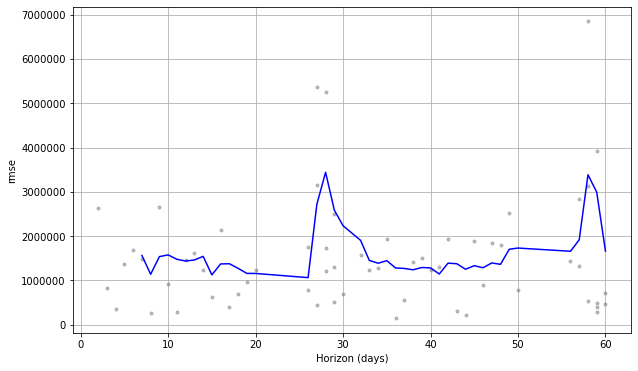

In [97]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.ticklabel_format(style='plain', axis='y')